# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hanief Al Jauziah
- **Email:** haniefaljauziah555@gmail.com
- **ID Dicoding:** hanifal

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada musim apa pelanggan paling banyak dan paling sedikit ?
- Pertanyaan 2 : Perbandingan data pelanggan pada tahun 2011 dan 2012 ?
- Pertanyaan 3 : Pada jam berapa pelanggan terbanyak dan paling sedikit ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv('/content/data/day.csv')
day_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/day.csv'

In [4]:
hour_df = pd.read_csv('/content/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Diatas saya sudah ngeload tabel DAY yang dimana datanya sudah didapatkan dari Google Drive yang sudah disiapkan oleh pihak tim
- Dan juga saya ngeload tabel Hour yang dimana data sudah didapatkan dari Google Drive yang sudah disiapkan oleh phak tim
- Untuk ngeload kedua tabel tersebut pastikan jalur filenya atau lokasi filenya benar, contohnya lokasi file saya di /content/data/day.csv dan /content/data/hour.csv

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Bisa dilihat dari kedua dataframe diatas yaitu day_df dan hour_df tidak ada missing value.
- Dan juga tidak adanya duplikasi pada data.

### Cleaning Data

In [ ]:
day_df.drop(['yr', 'mnth', 'weekday'], axis=1, inplace=True)
hour_df.drop(['yr', 'mnth', 'weekday'], axis=1, inplace=True)

In [51]:
day_df['datetime'] = pd.to_datetime(day_df['datetime'])
hour_df['datetime'] = pd.to_datetime(hour_df['datetime'])

In [43]:
day_df.drop(['workingday'], axis=1, inplace=True)
hour_df.drop(['workingday'], axis=1, inplace=True)

In [49]:
day_df.rename(columns={
    'date': 'datetime',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'count'
}, inplace=True)

In [64]:
hour_df.rename(columns={
    'date': 'datetime',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hr': 'hours',
    'atemp': 'feeling_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'cnt': 'count'
}, inplace=True)

In [38]:
day_df.season.replace({
      1: 'spring',
      2: 'summer',
      3: 'fall',
      4: 'winter'
  }, inplace=True)
hour_df.season.replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}, inplace=True)

day_df.weather_condition.replace({
    1: 'clear',
    2: 'mist',
    3: 'light_rain',
    4: 'heavy_rain'
}, inplace=True)
hour_df.weather_condition.replace({
    1: 'clear',
    2: 'mist',
    3: 'light_rain',
    4: 'heavy_rain'
}, inplace=True)

**Insight:**
- Disini saya akan menghapus kolom yr, mnth, weekday karna menurut saya kolom dteday sudah cukup untuk mencakup semua itu.
Saya juga akan mengganti type data dteday yang tadinya 'object' menjadi 'datetime' karna dteday menyimpan data waktu
- Disini juga saya menghapus kolom workingday karena sudah ada kolom holiday yang memberitahu apakah itu hari kerja atau tidak.
- Pastinya mengganti nama kolom agar lebih jelas
- Mengkonversi value pada kolom agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore ...

In [57]:
day_df.describe(include="all")

,instant,datetime,season,holiday,weather_condition,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.028728,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,0.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,0.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [60]:
print(day_df.columns)

Index(['instant', 'datetime', 'season', 'holiday', 'weather_condition',
       'temperature', 'feeling_temperature', 'humidity', 'wind_speed',
       'casual', 'registered', 'count'],
      dtype='object')


In [36]:
day_df.groupby(by="season")['count'].sum().sort_values(ascending=False).reset_index().head(10)


,season,count
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


In [58]:
result = day_df.groupby(pd.to_datetime(day_df['datetime']).dt.year).agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

print(result)

         registered  casual
                sum     sum
datetime                   
2011         995851  247252
2012        1676811  372765


In [59]:
hour_df.describe(include="all")

,instant,datetime,season,hr,holiday,weather_condition,temperature,feeling_temperature,humidity,wind_speed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,11.546752,0.028770,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,6.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,12.000000,0.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,18.000000,0.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,23.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [62]:
print(hour_df.columns)

Index(['instant', 'datetime', 'season', 'hr', 'holiday', 'weather_condition',
       'temperature', 'feeling_temperature', 'humidity', 'wind_speed',
       'casual', 'registered', 'count'],
      dtype='object')


In [65]:
hour_df.groupby(by="hours").agg({
    "count": ["sum"]
})

,count
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**
Untuk data DAY :
- Di rangkuman Data DAY terdapat jumlah pelanggan di keempat musim yang bisa dilihat ditabel setelahnya.
- Di tabel yang menunjukann kolom season dan count kita bisa melihat data pelanggan di keempat musim tersebut dan dari data itu diketahui musim yang paling adalah Fall dan yang paling sedikit adalah Spring.
- Dan juga diketahui perbedaan nilai yang sudah ( REGISTERED ) dan yang masih ( CASUAL ) yang dimana tahun 2011 untuk registered sebanyak 995851 dan yang casual 247252.
- Untuk tahun 2012 nya yang sudah (REGISTERED) sebanyak 1676811 sedangkan yang masih ( CASUAL ) 372765.

Untuk data HOUR :
- Di rangkuman Data HOUR terdapat informasi pelanggan terbanyak 17379.
- Berdasarkan tabel yang menampung kolom hours dan count diketahui pelanggan terbanyak pada jam 17 dan yang paling sedikit jam 4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa pelanggan paling banyak dan paling sedikit ??


Musim dengan pelanggan terbanyak: fall
Musim dengan pelanggan tersedikit: spring


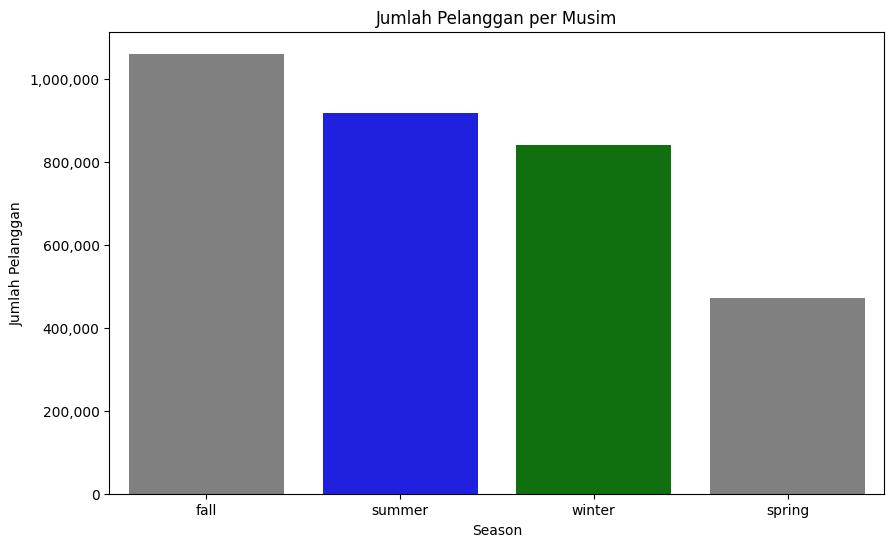

In [96]:
# melakukan grouping terhadap season dan count
seasonal_counts = day_df.groupby('season')['count'].sum().sort_values(ascending=False)
colors = {
    'fall': 'grey',
    'summer': 'blue',
    'winter': 'green',
    'spring': 'grey'
}

# visualisasi
plt.figure(figsize=(10, 6))

# Menambahkan hue dan menonaktifkan legend
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, hue=seasonal_counts.index,
            palette=colors, legend=False)

# format angka pada sumbu y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.title('Jumlah Pelanggan per Musim')
plt.xlabel('Season')
plt.ylabel('Jumlah Pelanggan')

# musim dengan pelanggan terbanyak dan tersedikit
most_customers_season = seasonal_counts.index[0]
least_customers_season = seasonal_counts.index[-1]

print(f"Musim dengan pelanggan terbanyak: {most_customers_season}")
print(f"Musim dengan pelanggan tersedikit: {least_customers_season}")


### Pertanyaan 2: Perbandingan data pelanggan pada tahun 2011 dan 2012

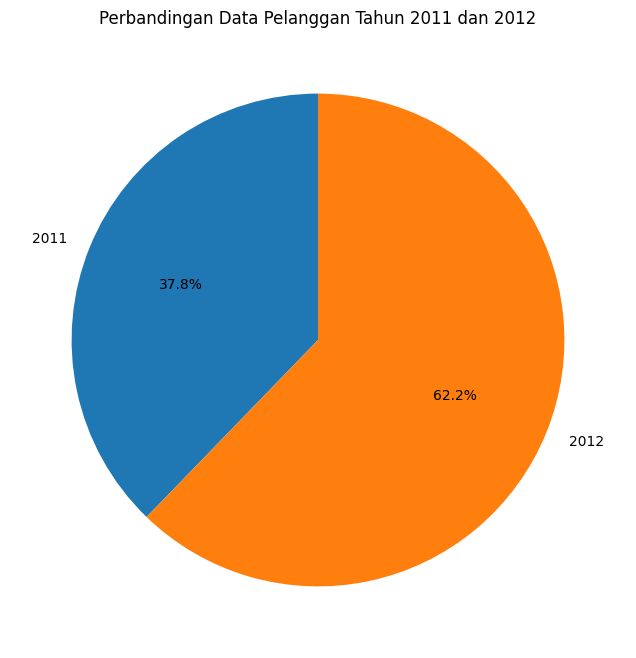

In [87]:
# Agregasi data pelanggan per tahun
yearly_counts = day_df.groupby(day_df['datetime'].dt.year)['count'].sum()

# Data untuk pie chart
labels = yearly_counts.index.astype(str)
sizes = yearly_counts.values

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Data Pelanggan Tahun 2011 dan 2012')
plt.show()

### Pertanyaan 3: Pada jam berapa pelanggan terbanyak dan paling sedikit ?

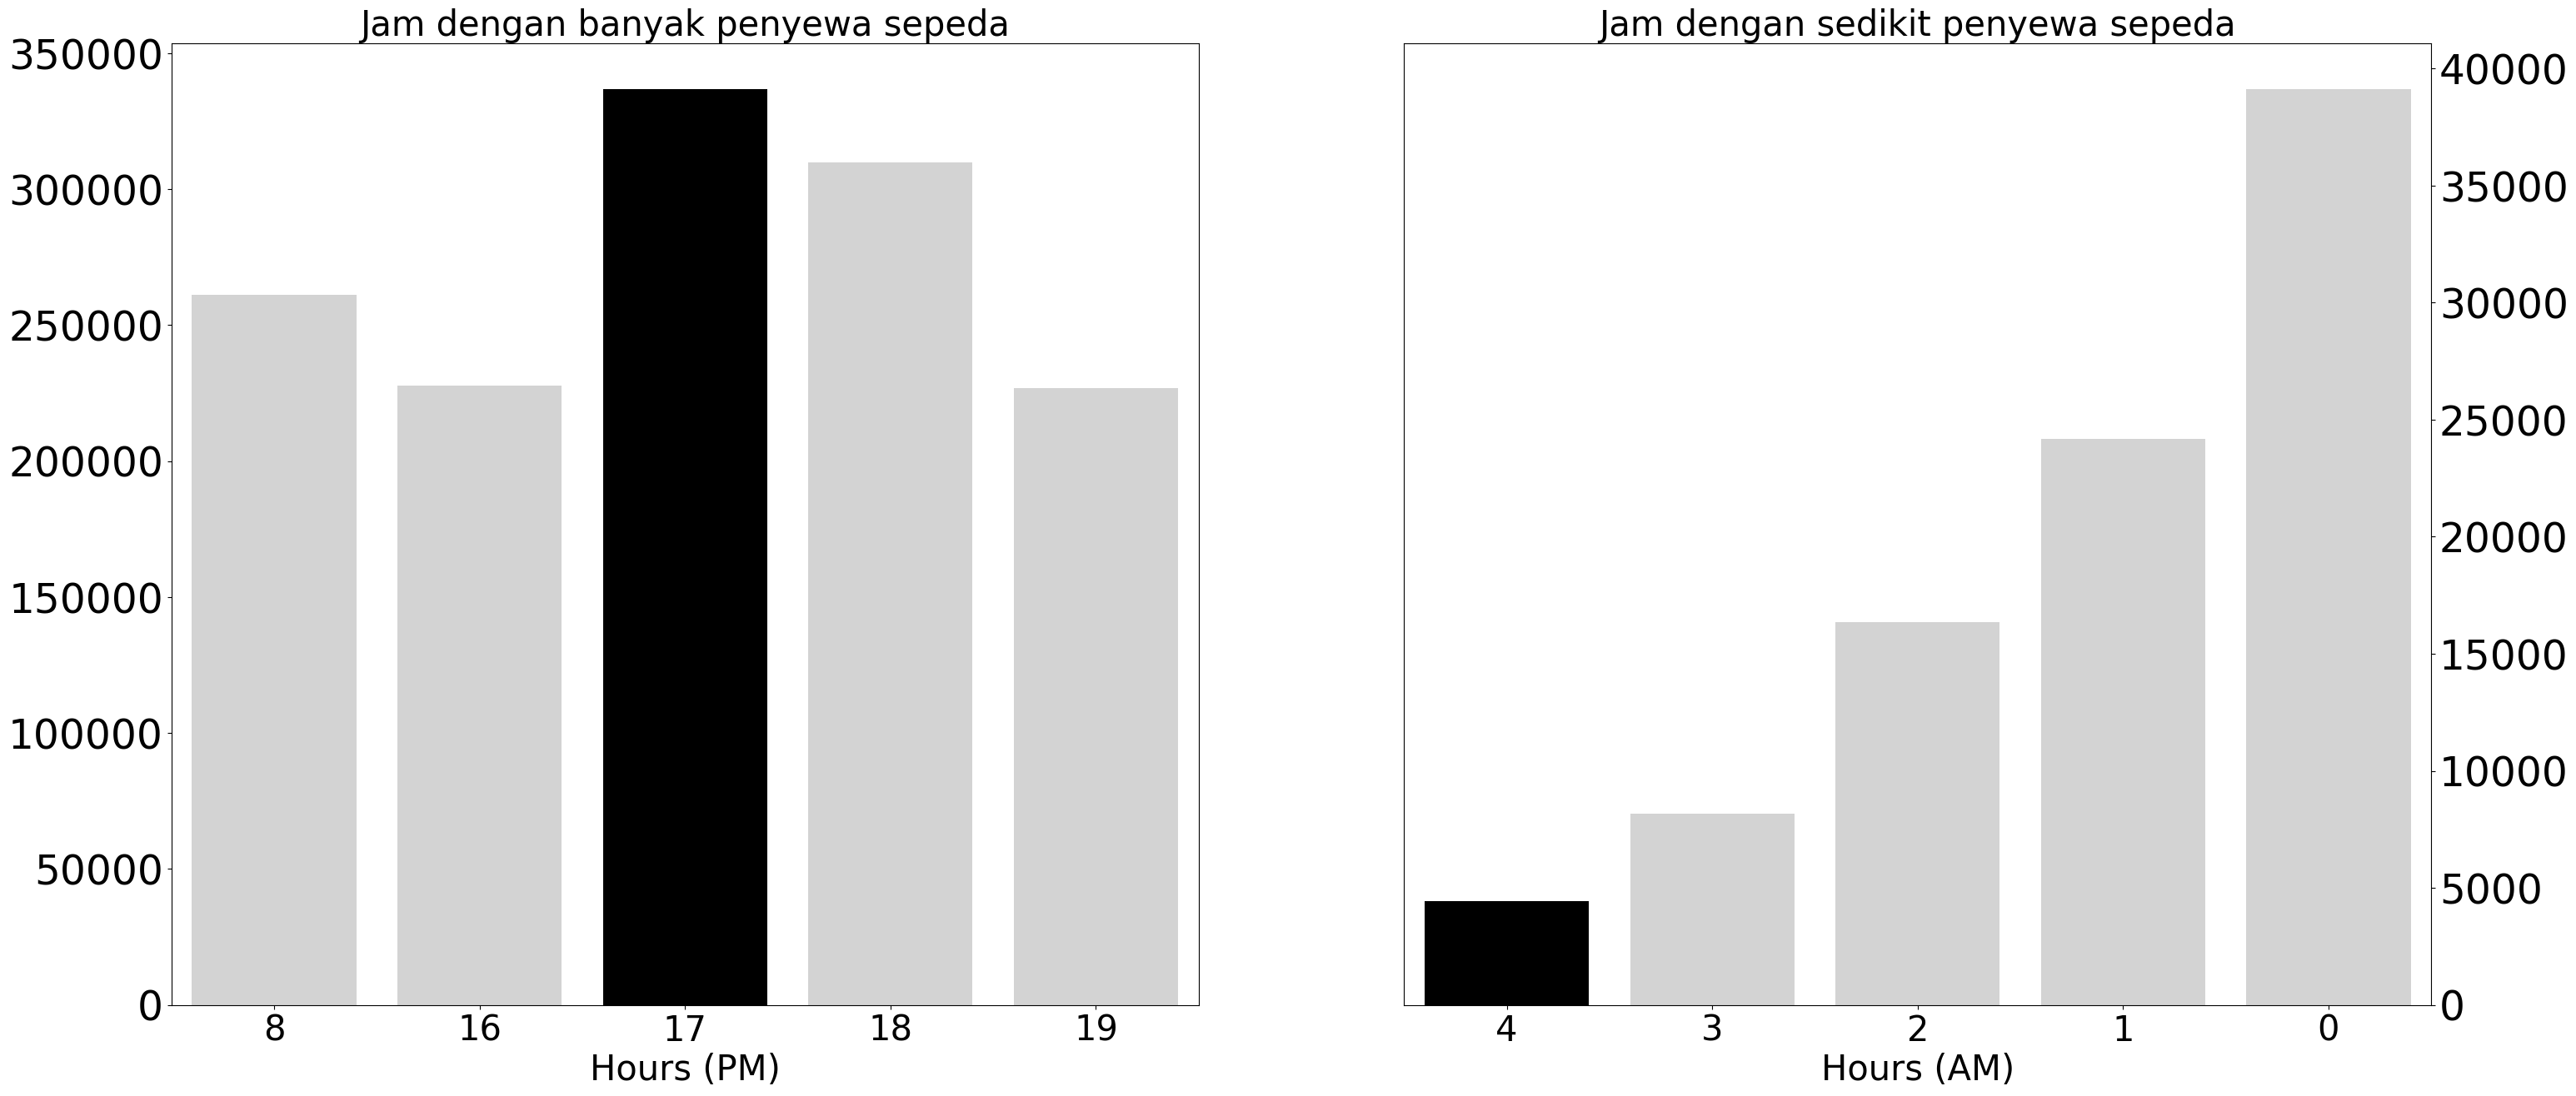

In [95]:
# melakukan grouping terhadap hours dan count
sum_order_items_df = hour_df.groupby("hours")['count'].sum().sort_values(ascending=False).reset_index()

# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hours", y="count", hue="hours", data=sum_order_items_df.head(5),
            palette=["#D3D3D3", "#D3D3D3", "#000000", "#D3D3D3", "#D3D3D3"], ax=ax[0], legend=False)

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hours", y="count", hue="hours", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5),
            palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#000000"], ax=ax[1], legend=False)

# mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()


**Insight:**
- Musim dengan pelanggan terbanyak adalah Fall, sedangkan Musim dengan pelanggan paling sedikit adalah Spring
- Jumlah penyewa pada tahun 2012 lebih banyak dibandingkan dengan tahun 2011. Kita bisa lihat dari pie chart tersebut dimana persentase pada tahun 2012 sebanyak 68.8% lebih besar dibandingkan tahun 2011 dengan persentase sebanyak 31.2%
- Data penyewaan sepeda paling banyak terjadi di jam 17 PM, sedangkan yang paling sedikit terjadi pada jam 04 AM

## Analisis Lanjutan (Opsional)

### **RFM Analysis**

In [111]:
# Buat kolom baru untuk RFM
day_df['datetime'] = pd.to_datetime(day_df['datetime'])  # Pastikan kolom 'datetime' bertipe datetime
day_df['recency'] = (day_df['datetime'].max() - day_df['datetime']).dt.days
rfm_df = day_df.groupby('instant').agg({'recency': 'min', 'datetime': 'count', 'count': 'sum'})
rfm_df.rename(columns={'datetime': 'frequency', 'count': 'monetary'}, inplace=True)

rfm_df.head()

# Tentukan quartile untuk setiap metrik RFM
quantiles = rfm_df.quantile(q=[0.25, 0.5, 0.75])

# Buat fungsi untuk memberi skor RFM
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Beri skor RFM
rfm_df['r_quartile'] = rfm_df['recency'].apply(RScore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(FMScore, args=('monetary',quantiles,))

rfm_df.head()

# Gabungkan skor RFM menjadi satu kolom
rfm_df['RFMScore'] = rfm_df.r_quartile.map(str) + rfm_df.f_quartile.map(str) + rfm_df.m_quartile.map(str)

rfm_df.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
instant,,,,,,,
1,730,1,985,1,1,1,111
2,729,1,801,1,1,1,111
3,728,1,1349,1,1,1,111
4,727,1,1562,1,1,1,111
5,726,1,1600,1,1,1,111


## Conclusion

- Pertanyaan 1 : Pada musim apa pelanggan paling banyak dan paling sedikit ?
- Pertanyaan 2 : Perbandingan data pelanggan pada tahun 2011 dan 2012 ?
- Pertanyaan 3 : Pada jam berapa pelanggan terbanyak dan paling sedikit ?

*   Pada Bar Chart tersebut kita bisa melihat bahwa pelanggan paling banyak di musim fall, sedangkan pelanggan paling sedikit di musim spring
*   Pada Pie Chart diatas penyewa pada tahun 2012 lebih banyak dibandingkan dengan tahun 2011. Kita bisa lihat dari pie chart tersebut dimana persentase pada tahun 2012 sebanyak 68.8% lebih besar dibandingkan tahun 2011 dengan persentase sebanyak 31.2%
*   Pada Bar Chart diatas penyewaan sepeda paling banyak terjadi di jam 17 PM, sedangkan yang paling sedikit terjadi pada jam 04 AM



